#[A rule-based aproach for information extraction from resumes](https://towardsdatascience.com/do-the-keywords-in-your-resume-aptly-represent-what-type-of-data-scientist-you-are-59134105ba0d)



**Abstract** - With the fast evolution of artificial intelligence in domanins
such as computer vision, natural language procesing(NLP), robotics etc., it was only a matter of time until it would be integrated in day to day tasks in different places such as, object recognition, chat bots, information extraction from text documents such as resumes and many more. In this *notebook* we present a rule-based aproach for information extraction from CV, extracting a candidates names and skills based on a predetermined set of domanins and their representing elements.

>**Ketwords**: rule-based, information extraction, dictionary, PhraseMatcher

># 1.Introduction
>>The resume is one of the most important documents that a person can have. It represents a description of their entire life, from their personal information to education, work experience and other particular details. Nowdays big companies recive hundreds of resumes witch need to be analized by one or more dedicated persons from a dedicated department and only a small portion of these are selected. The process is very resource consuming, not only from a time perspective but from a financial perspective, the person spends a lot of time analizing the resumes, time that can be invested somewhere else. 

>>The process of automating the candidates selection based on their resumes has been one of the most difficult tasks, given the large amount of information and the diversity that needs to be processed. For a person, the process of analyzing a resume is ver simple, howerver for a machine it is an extremly complicated task, but that may change.The resumes come in all forms and formats, the lack of a standard format making the information extraction process that much harder. 

>>With the evolution of natural language processing, a handfull of powerfull tools, alghoritms and discoveries such as statistical models like BERT, spacy, nltk etc. but also the evolution of graph databases and the research for knowledge graphs have been proven very promissing for the task. In this *notebook* we will present a rule-based aproach for extracting information from resumes, the extracted information refering to the candidates names and skills .

>>The rest of the *notebook* is structured as following: Section 2 presents the related work, Section 3 presents the aproach and the implementation of the proposed aproach and  Section 4 presents the conclusions and future work.    


    



># 2.Related works

>>The task of information extaction from resumes has been aproached by many researchers. The number and variety of proposed solutions are almost imposible to count, going from rule-based aproaching to diffrent machine learning alghoritms and even semantic and knowledge based sollutions and hybrid combinations between these. In almost any of the above mentioned aproaches, the resume has been treated as a seni-structured document, by doing so, the main blocks of the document could be aproximated without using any clustering alghoritm, giving a decent start. In the rule-based sector Jinesh D[1] presented an aproach for extracting diffrent types of information from resumes using a content-based and latout based aproach. The presented solution used the layout of the resumes to determine the main blocks, then extracting the information from diffrent  blocks using a dictionary of keywords(ex: extracting the university using a list of all universities in USA). This aproach managed get 97% accuracry for extracting the personal based on a heuristic rule-based aproach  , but performed poorly on the education segment using a dictionary of words achiving an average 54% precision, as the author expained the reason being the lack of keywords in the used dictionary. 

>>In the field of machine learning and statistical models, a variety of different models and methods were explored, some of them achiving state of the art performance. Jacob D.[2] presented BERT, a bidirectional model capable of achiving state of the art in NLP tasks such as sentence-pair classification. The model has been succesfully aplied in the doamin of information extraction from documents by Vedant B.[3]. The proposed solution of the authors was converting the resume from PDF to HTML and then to LinkedIn format. After the conversion, they use the sentence-pair classifier to clasify if a specific candidate was suitable for the job by comparing the job description with the previous job descriptions provided my the candidate. The model achived a strong 73% accuracy but it requiered that a previous job description was provided by the candidate.

>>Other aproaches on in the machine learning field include the usage of support vector machine(SVM) and conditional random fields(CRF), witch achived very good performance in a variety of diffrent text analysis and information extraction tasks. Jlaze C. [4] proposed a content-based and layout-based aproach based on SVM and CRF. The proposed solution used SVM to clasify the text in large blocks such as: Persoanl block and Educational blockm then a CRF model was used to determine the coresponding label of a text sequense. The SVM achived a 70% accuracy in classifying the text while the CRF achived an average 72% accuracy. They also used rule-based features for fine-tuning the model to improve accuracy in some areas.

>>Huai H [5] used SVM and the  for extracting metadata,  with 15 diffrent labels, the obtained accuracy was 92.9%. The aproached sollution was a rule-based,context-dependent wold clustering method. 

>>In the semantic/knowledge sector, the aproaches are much more diffrent, trying to find the meaning of every word, and asociating a known concept to it. 
D. Celik [6] presented an onlology based system witch uses as description languages for the semantic information OWL, RDFS, and SWRL. Their aproach used 7 knowledge bases with 7 different ontologies to help the system understand the meaning of words and associate a concept from one of the knowledge bases to every word from the resume. They also proposed a semantic matching step(SMS) for identifying synonims in the text. The aproach managed to get good results but it requiered a large amount of data to be functional(6 out of 7 ontologies need to be known and structured before).


># 3.The proposed solution
>>Even if the resume can be considered a semi-structured document, the vast amount of information and the way that the information is delivered in the resume makes almost no diffrence if we treat it as a semi-structured document or a completly unstructured document, given what is proposed in this *notebook*. Given the fact that the main focus of this project is to extract the skills, the only positive efect that the segmentation step of the resume would be a small increase in processing speed, almost unnoticeable since the amount of data is relatively small. Therefore the proposed aproach uses a PhraseMathcer to match the patterns in the resume with the given keywords to find similarity between them. 
Before we detail the aproach, some explanation and reasons behind the chosen technologies are necesary, therefore we will list them below and explain why they were chosen:
1. pandas: on of the top three most powerfull libraries for data science it helps in manipulating the data in very easy ways for both visualizing and changing it
2. spacy: the aproach uses a PhraseMatcher, this feature is very eficiently implemented in spacy, 
3. matplotlib: the best instrument to create plots and visualize data in python.

>>Every used library can be visualized with the atached description in Figure 1.



In [0]:
#Figure 1: every used library in the project

import pandas as pd                     #for easy visualizing of the data
import matplotlib.pyplot as plt         #for plotting information 
import spacy                            #the library that implements the PhraseMatcher
import json                             #every row in the dataset file is parsed as a json object 
import numpy as np                      #we will use it later to eliminate the empty rows from the dataframe
from spacy.matcher import Matcher       #necesary for comparison of diffrent aproaches
from spacy.matcher import PhraseMatcher #the PhraseMatcher

>>## 3.1 The dataset
The dataset is composed from 220 resumes in text format stored in the json file 
"Entity Recognition in Resumes.json". Every row of the file has the following structure:  
{"content" : resume text}



>>## 3.2 The proposed aproach

The aproach is as follows: first we read the skills and domanins list from a CSV file called "abilitati.csv", the information is directly read into a dataframe object. The data is presented in Figure 2.  

In [2]:
#Figure 2. The content of the file "abilitati.csv"
categories = pd.read_csv("abilitati.csv")
categories

,Statistics,Machine Learning,Deep Learning,R Language,Python Language,NLP,Data Engineering
0,statistical models,linear regression,neural network,ggplot,python,nlp,aws
1,statistical modeling,logistic regression,keras,shiny,flask,natural language processing,ec2
2,probability,K means,theano,cran,django,topic modeling,amazon redshift
3,normal distribution,random forest,face detection,dplyr,pandas,lda,s3
4,poisson distribution,xgboost,neural networls,tidyr,numpy,named entity recognition,docker
5,survival models,svm,convolutional neural network(cnn),lubricate,scikitlearn,pos tagging,kubernets
6,hypothesis testing,naive bayes,recurent neural network(RNN),knitr,sklearn,word2vec,scala
7,bayesian inference,pca,object detection,NaN,matplotlib,word embedding,teradata
8,factor analysis,decision tree,yolo,NaN,scipy,lsi,google big query
9,forecasting,svd,gpu,NaN,bokeh,spacy,aws lambda


After that we read the resumes from the json file. Since the file does not have a regular json structure, we can use the fact that every resume is written on a single row to get every resume easy. After that the text is converted to a json object, then the resume is extracted and a new dataframe is created that will store all resumes and the information that will be added subsequently such as name and skills. Below is the implementation of the explained steps.  

In [0]:
#reading the resumes from the json file
resumes = []
resumes_file = open("/content/Entity Recognition in Resumes.json", 'r')
resumes = resumes_file.readlines()

In [0]:
#converting every line to json object 
resumes_json = []
for resume in resumes:
  resume_json = json.loads(resume)
  resumes_json.append(resume_json)

In [0]:
#this instruction is used to display the full resume in the dataframe, 
#otherwise only a number of characters will be displayed 
pd.set_option('display.max_colwidth', -1)

In [6]:
#a sample of the resumes
resumes_df = pd.DataFrame([res['content'] for res in resumes_json])
resumes_df.sample(1)

0
75  Sarfaraz Ahmad\nAssociate network engineer - TATA Communications Ltd\n\nMuzaffarpur, Bihar - Email me on Indeed: indeed.com/r/Sarfaraz-Ahmad/1498048ada755ac3\n\nCisco Certified Internetwork Associate in Routing & Switching with progressive experience in\ndeployment and administration of Network infrastructure. I am looking for opportunities to further\nimprove my abilities & skills in the field of Network and Security technologies.\n\n➢ Professional 2.5 years of experience in network Implementation & Troubleshooting in local and\nremote environments.\n➢ Well accented with the key IT skills in the domain of LAN/WAN/Network Security, installation &\nconfiguration of IT networks, maintenance & troubleshooting.\n➢ Potential of handling multiple tasks easily and capable of meeting deadlines.\n➢ Possess excellent interpersonal communications and organizational skills.\n\nWORK EXPERIENCE\n\nAssociate network engineer\n\nTATA Communications Ltd -  Pune, Maharashtra -\n\nMarch 2017 to Present\n\nDepartment: CMIP (IP Provisioning)\n\nResponsibilities:-\n➢ Working on Alcatel Migration project for Tata Communications Ltd, responsible for provisioning\nand migrating customer services from Cisco (7200/7600) /Juniper (MX104) to Alcatel provider\nedge router (SR 7750)\n➢ To carry out bulk migration and planned events of enterprise customers to enhance the network\ncapabilities and compatibilities for new technologies.\n➢ Responsible for carrying domestic as well as international customer services migration\nactivities in bulk. Involving all other stakeholders responsible for end to end delivery of customer\nservices, to carry the successful migration.\n➢ Parenting existing business switch ring with Alcatel Routers in combination with cisco routers\nwith the help of field Engineers and synchronizing vlan database on each switch.\n➢ Shut the interface and protocol on Cisco Routers and un-shut the interface on Alcatel routers\nduring Migration activity.\n➢ Comparing the results of pre-check and post-checks and revert the links to cisco that are not\ncoming Up on Alcatel or not compatible with cisco i.e. EIGRP.\n➢ Troubleshooting and resolving the customer issues related to either at routing level such as\nEIGRP, OSPF, BGP, MPLS or at access level Post migration activity.\n➢ Troubleshooting and managing LAN-to-LAN VPN on cisco router.\n➢ Troubleshooting and managing GRE Tunnel on services Getaway.\n➢ Configuration on cisco, juniper, Huawei switch creation Ether channel, VLAN, MSTP, QNQ,\nDot1Q etc.\n➢ Configuring and managing SVI interface on a Layer3 switch to provide inter VLAN routing.\n➢ Configuration Line VTY on customer CISCO router.\n\nhttps://www.indeed.com/r/Sarfaraz-Ahmad/1498048ada755ac3?isid=rex-download&ikw=download-top&co=IN\n\n\n➢ Configuration port security on customer hand up switch port.\n➢ Troubleshooting end user network connectivity issue.\n➢ Performing technical escalations in line with company policy.\n➢ Accountable for customer review meetings weekly basis & giving feedback to the subordinate\nteam and Management.\n➢ Responsible for any internal or external escalation (Customer's End)\n➢ Focus on customer requirements and providing them strategic plans for backups, redundancies\nand minimum downtimes under severe outages.\n\nNetwork engineer\n\nCisco -  Mumbai, Maharashtra -\n\nAugust 2015 to February 2017\n\nResponsibilities/Achievement\n➢ Experience in configuring and troubleshooting of routing protocols and Firewalls\n➢ Backing up and Upgrading software on Cisco router, switches using TFTP server\n➢ Troubleshooting end user network connectivity issue\n➢ Experience in installing and configuring DHCP services on Cisco Router and Switch.\n➢ Configuring and troubleshooting Ether channel/Port-channel issue\n➢ Configuring and troubleshooting VLAN, VTP and STP.\n➢ Configuring and managing BPDU guard and Filter on a switch\n➢ Providing port security on switch interface\n➢ Dealing with Dynamic routing protocol Such as EIGR

In [0]:
resumes_list = [res['content'] for res in resumes_json]

In [8]:
#a sample from the resume list
print(resumes_list[0])

Abhishek Jha
Application Development Associate - Accenture

Bengaluru, Karnataka - Email me on Indeed: indeed.com/r/Abhishek-Jha/10e7a8cb732bc43a

• To work for an organization which provides me the opportunity to improve my skills
and knowledge for my individual and company's growth in best possible ways.

Willing to relocate to: Bangalore, Karnataka

WORK EXPERIENCE

Application Development Associate

Accenture -

November 2017 to Present

Role: Currently working on Chat-bot. Developing Backend Oracle PeopleSoft Queries
for the Bot which will be triggered based on given input. Also, Training the bot for different possible
utterances (Both positive and negative), which will be given as
input by the user.

EDUCATION

B.E in Information science and engineering

B.v.b college of engineering and technology -  Hubli, Karnataka

August 2013 to June 2017

12th in Mathematics

Woodbine modern school

April 2011 to March 2013

10th

Kendriya Vidyalaya

April 2001 to March 2011

SKILLS

C (Less

For easier final storage of the data we define a specific class that represents a candidates profile. The final data will be stored in a class called "Profile",witch can be in Figure 4.

In [9]:
#same sample from the dataframe
resumes_df.iloc[:1]

,0
0,"Abhishek Jha\nApplication Development Associate - Accenture\n\nBengaluru, Karnataka - Email me on Indeed: indeed.com/r/Abhishek-Jha/10e7a8cb732bc43a\n\n• To work for an organization which provides me the opportunity to improve my skills\nand knowledge for my individual and company's growth in best possible ways.\n\nWilling to relocate to: Bangalore, Karnataka\n\nWORK EXPERIENCE\n\nApplication Development Associate\n\nAccenture -\n\nNovember 2017 to Present\n\nRole: Currently working on Chat-bot. Developing Backend Oracle PeopleSoft Queries\nfor the Bot which will be triggered based on given input. Also, Training the bot for different possible\nutterances (Both positive and negative), which will be given as\ninput by the user.\n\nEDUCATION\n\nB.E in Information science and engineering\n\nB.v.b college of engineering and technology - Hubli, Karnataka\n\nAugust 2013 to June 2017\n\n12th in Mathematics\n\nWoodbine modern school\n\nApril 2011 to March 2013\n\n10th\n\nKendriya Vidyalaya\n\nApril 2001 to March 2011\n\nSKILLS\n\nC (Less than 1 year), Database (Less than 1 year), Database Management (Less than 1 year),\nDatabase Management System (Less than 1 year), Java (Less than 1 year)\n\nADDITIONAL INFORMATION\n\nTechnical Skills\n\nhttps://www.indeed.com/r/Abhishek-Jha/10e7a8cb732bc43a?isid=rex-download&ikw=download-top&co=IN\n\n\n• Programming language: C, C++, Java\n• Oracle PeopleSoft\n• Internet Of Things\n• Machine Learning\n• Database Management System\n• Computer Networks\n• Operating System worked on: Linux, Windows, Mac\n\nNon - Technical Skills\n\n• Honest and Hard-Working\n• Tolerant and Flexible to Different Situations\n• Polite and Calm\n• Team-Player"


In [0]:
#Figure 4. The Profile class that will store the profiles
class Profile:  
  """
  This class contains information about every employee as therir:
   name, CV, and skills
   
  Attributes 
  ----------
   name : str
      name of the candidate
   CV   : str
      the resume as a string
  skills : dictionary
      describes the candidates situation on every domanin as key-value pairs 
      where the key is one of the domains and the value is the compatibility score
      ex : {
            Data science     : [SQL, SQL]
            Machine learning : [neural networks]
            Data engineering : [S3, AWS]
            }
   """
  def __init__(self,name : str,CV : str,skills: type({})):
    self.name = name
    self.CV = CV
    self.skills = skills
  def set_name(self,name):
    self.name = name
  def get_name(self):
    return self.name
  def get_skills(self):
    return self.skills
  def set_skills(self,skills):
    self.skills = skills
  def get_CV(self):
    return self.CV
  def set_CV(self, CV):
    self.CV = CV

The next part is preparing the spacy model for utilizing the PhraseMatcher. Spacy requires a specifical model witch can be downloaded with the below instructions. The models cand be found [on the libraries website](https://spacy.io/models/en). 

In [11]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [0]:
#loading the downloaded model
nlp = spacy.load("en_core_web_sm")

After the model has been succesfully loaded, we begin the information extraction process. The first step is extracting the name from the resume.
Extracting the name has proven to a relative difficult task given the semi-structured nature of the resume, meaning that it can appear anywhere in the document, however we can relatively safe assume that  it apears on the top side. For the name extaction we present two diffrent aproaches.
The first uses the assumption that the name is composed by two proper nouns, giving the following posibility: it is posible to identify the name of a person by searching in the text for two consecutive nouns in the first part of the resume. The implementaion is presented in Figure 5. 

In [0]:
#creating a matcher object
matcher = Matcher(nlp.vocab)

In [0]:
#Figure 5. the name extraction process based on proper nouns.
def extract_name_phrase_matcher(resume_text):
    nlp_text = nlp(resume_text)
    
    # First name and Last name are always Proper Nouns
    pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]
    
    matcher.add('name', None, pattern)
    
    matches = matcher(nlp_text)
    
    for match_id, start, end in matches:
        span = nlp_text[start:end]
        return span.text

In [0]:
names = []
for resume in resumes_list:
  name = extract_name_phrase_matcher(resume)
  names.append(name)

The extracted names from the resumes can be visualized in Figure 6. As the below figure shows, the percentage of accuracy is relatively good, however some errors still appear. 

In [16]:
#Figure 6 The extracted names
for i in range(0,len(names)):
  print(i,"    ", names[i])

0      Abhishek Jha
1      Afreen Jamadar
2      Akhil Yadav
3      Alok Khandai
4      Ananya Chavan
5      Anvitha Rao
6      Senior Program
7      Arun Elumalai
8      Ashalata Bisoyi
9      Ashok Kunam
10      Tamil Nadu
11      Avin Sharma
12      Ayesha B
13      Ayushi Srivastava
14      Bhawana Daf
15      Financial Analyst
16      Dhanushkodi Raj
17      Dinesh Reddy
18      Dipesh Gulati
19      Dushyant Bhatt
20      Govardhana K
21      Harini Komaravelli
22      Hartej Kathuria
23      Ijas Nizamuddin
24      Imgeeyaul Ansari
25      Jay Madhavi
26      Jitendra Babu
27      Jyotirbindu Patnaik
28      Karthihayini C
29      Karthik GV
30      Kartik Sharma
31      Kasturika Borah
32      Kavitha K
33      Kavya U.
34      Khushboo Choudhary
35      Technical Support
36      Koushik Katta
37      Kowsick Somasundaram
38      Lakshika Neelakshi
39      Madas Peddaiah
40      Madhuri Sripathi
41      Mahesh Vijay
42      Manisha Bharti
43      Manjari Singh
44      Mohamed A

One example of misidentifying the name can be seen below, the model parses the resume and identifies in a wrong way the first two proper nouns.    

In [17]:
#the wrong extracted name
extract_name_phrase_matcher(resumes_list[197])

'ADDITIONAL INFORMATION'

The second aproach for extracting the name goes from the assumption that the name is right at the start of the resume on a diffrent row, witch in many cases is true. Therefore we split the resume in rows and extract the name as the content of the first row. The implementation is shown below.

In [0]:
def extract_name_split_text(resume_text):
  return resume_text.split("\n")[0]

In [0]:
names.clear()
for resume in resumes_list:
  names.append(extract_name_split_text(resume))

In [20]:
for i in range(0,len(names)):
  print(i," ",names[i])

0   Abhishek Jha
1   Afreen Jamadar
2   Akhil Yadav Polemaina
3   Alok Khandai
4   Ananya Chavan
5   Anvitha Rao
6   arjun ks
7   Arun Elumalai
8   Ashalata Bisoyi
9   Ashok Kunam
10   Asish Ratha
11   Avin Sharma
12   Ayesha B
13   Ayushi Srivastava
14   Bhawana Daf
15   Darshan G.
16   Dhanushkodi Raj
17   Dinesh Reddy
18   Dipesh Gulati
19   Dushyant Bhatt
20   Govardhana K
21   Harini Komaravelli
22   Hartej Kathuria
23   Ijas Nizamuddin
24   Imgeeyaul Ansari
25   Jay Madhavi
26   Jitendra Babu
27   Jyotirbindu Patnaik
28   Karthihayini C
29   Karthik GV
30   Kartik Sharma
31   Kasturika Borah
32   Kavitha K
33   Kavya U.
34   Khushboo Choudhary
35   kimaya sonawane
36   Koushik Katta
37   Kowsick Somasundaram
38   Lakshika Neelakshi
39   Madas Peddaiah
40   Madhuri Sripathi
41   Mahesh Vijay
42   Manisha Bharti
43   Manjari Singh
44   Mohamed Ameen
45   Mohini Gupta
46   Navas Koya
47   Navjyot Singh Rathore
48   Nazish Alam
49   Nidhi Pandit
50   Nikhileshkumar Ikhar
51   Nitin T

The above list shows a better accuracy, however thats to be expected given the nature of the dataset. The solution is much more likely to generalize poorly on a larger and a more varied dataset. For this case we will keep the second aproach since it generated better results for our case.

In [21]:
#the accurate extraction of the name, compared to the previous method
print(names[197])

Pavithra M


With the names and the resumes known, the next step is creating the profiles list, witch will store all the profiles based on the resume. The creation and the population of the list can be seen below.

In [0]:
profiles = []

In [0]:
profiles.clear()
for i in range(0,len(names)):
  profile = Profile(names[i],resumes_list[i],None)
  profiles.append(profile)

We also add the names in the dataframe for better visualizing the data as can be seen below.

In [0]:
resumes_df[1] = names

In [49]:
resumes_df.sample()

,Name,Resume,Skills,Statistics,Machine Learning,Deep Learning,R Language,Python Language,NLP,Data Engineering
145,Sayani Goswami,"Sayani Goswami\nI Phone solution Consultant\n\nKolkata, West Bengal - Email me on Indeed: indeed.com/r/Sayani-\nGoswami/066e4d4956f82ee3\n\nWORK EXPERIENCE\n\nI Phone solution Consultant\n\n-\n\nO...","{'Statistics': [], 'Machine Learning': [], 'Deep Learning': [], 'R Language': [], 'Python Language': [], 'NLP': [], 'Data Engineering': []}",0,0,0,0,0,0,0


The final step is represented by the skills extraction process. Every category and their respective keyword can be seen in Figure 7. It is important to remove the null values from the dataframe since pandas automaticly adds null values to the columns that have lower count of elements compared to the longest column to compensate the diffrence. Beacause of this we define a function that will tell us if an element is null or not.

In [0]:
def is_nan(x):
  return x is np.nan or x != x


In [27]:
#Figure 7. Every category and their specific keyowrds
for category in categories.columns:
  print("-----------\n",category,"\n-----------")
  for element in categories[category]:
    if is_nan(element) == False:
      print(element)

-----------
 Statistics 
-----------
statistical models
statistical modeling
probability
normal distribution
poisson distribution
survival models
hypothesis testing
bayesian inference
factor analysis
forecasting
markov chain
monte cario
-----------
 Machine Learning 
-----------
linear regression
logistic regression
K means
random forest
xgboost
svm
naive bayes
pca
decision tree
svd
ensemble models
boltzman machine
-----------
 Deep Learning 
-----------
neural network
keras
theano
face detection
neural networls
convolutional neural network(cnn)
recurent neural network(RNN)
object detection
yolo
gpu
cuda
tensorflow
lstm
gan
opencv
-----------
 R Language 
-----------
ggplot
shiny
cran
dplyr
tidyr
lubricate
knitr
-----------
 Python Language 
-----------
python
flask
django
pandas
numpy
scikitlearn
sklearn
matplotlib
scipy
bokeh
statsmodel
-----------
 NLP 
-----------
nlp
natural language processing
topic modeling
lda
named entity recognition
pos tagging
word2vec
word embedding
lsi
spa

To extract the skills of every candidate we iterate through every category of skills, creating a list composed from their specific keywords. This list will be used by the PhraseMatcher to eficiently match the terms that we are looking for with the resume. The candidates information is stored in a dictionary in with the following structure:
>-the keys are represented by the categories  
>-the values of those keys are represented by a list of all matched terms from the resume
After the dictionary is created, we return it, as can be seen in Figure 8.

In [0]:
#Figure 8. The implementation of the skill extraction alghoritm
def get_skills(resume):
  skills = {}
  doc = nlp(resume)

  
  for category in categories:
    matched_skills = []
    terms = [term for term in categories[category] if is_nan(term) == False]
    patterns = [nlp.make_doc(text) for text in terms]
    matcher = PhraseMatcher(nlp.vocab,attr="LOWER")
    matcher.add("TerminologyList", None, *patterns)
    matches = matcher(doc)
    
    for match_id, start, end in matches:
      span = doc[start:end]
      matched_skills.append(span)
    skills[category] = matched_skills
  return skills 


We add the skills to the dataframe and add some modifications of the aspect to better understand the content of the dataframe.

In [29]:
skills_list = [candidate.get_skills() for candidate in profiles]
skills_list
resumes_df[2] = skills_list
resumes_df.sample()

,0,1,2
133,"Saurabh Saurabh\nBengaluru, Karnataka - Email me on Indeed: indeed.com/r/Saurabh-\nSaurabh/87e6b26903460061\n\nWilling to relocate: Anywhere\n\nWORK EXPERIENCE\n\nDeveloper Support Engineer\n\nMicrosoft iGTSC - Bangalore Urban, Karnataka -\n\nAugust 2007 to Present\n\nEDUCATION\n\nCertificate of Achievement\n\nMicrosoft Virtual Academy\n\nDecember 2016\n\nSKILLS\n\nC, C++, Data Structure, Java (1 year)\n\nADDITIONAL INFORMATION\n\n➢ Managerial Skills: Organizer and volunteer at many inter and intra college events, symposia\netc. in\ncollege.\n➢ Co-curricular: -\n1. Selected by College (TISL) to train the first-year engineering students under the Finishing\nSchool\nProgram (January 2017)\n2. District level soccer and cricket player.\n3. Honored at State Level Singing competition; Performed in college.\n\n➢ Leadership Skills: Effective leadership; associated with many student led organizations;\nStudent leader\nfor Oxygen, A movement for and by Students (2007 &amp; 2009)\n\nDECLARATION\n\nThe abovementioned is true to the best of my knowledge, information and personal belief.\nPlace: Bangalore.\n\nhttps://www.indeed.com/r/Saurabh-Saurabh/87e6b26903460061?isid=rex-download&ikw=download-top&co=IN\nhttps://www.indeed.com/r/Saurabh-Saurabh/87e6b26903460061?isid=rex-download&ikw=download-top&co=IN",Saurabh Saurabh,None


In [30]:
resumes_df.rename(columns = {0:"Resume",1:"Name",2:"Skills"},inplace=True)
pd.set_option('display.max_colwidth', 200)
resumes_df = resumes_df[["Name", "Resume", "Skills"]]
resumes_df.sample()

,Name,Resume,Skills
53,Prakriti Shaurya,"Prakriti Shaurya\nSenior System Engineer - Infosys Limited\n\nMangalore, Karnataka - Email me on Indeed: indeed.com/r/Prakriti-\nShaurya/5339383f9294887e\n\nDetail-oriented individual with three y...",None


Using the previous presented alghoritm, we extract the skills of every candidate, adding them into their profiles, in the profiles list.
The process and the output of the skills extraction process can be seen in Figure 9.

In [31]:
#Figure 9. The results of the skill extraction process
i = 0
for resume in resumes_list:
  skills = get_skills(resume)
  print(skills)
  profiles[i].set_skills(skills)
  i+=1

{'Statistics': [], 'Machine Learning': [], 'Deep Learning': [], 'R Language': [], 'Python Language': [], 'NLP': [], 'Data Engineering': []}
{'Statistics': [], 'Machine Learning': [], 'Deep Learning': [], 'R Language': [], 'Python Language': [], 'NLP': [], 'Data Engineering': [SQL]}
{'Statistics': [], 'Machine Learning': [], 'Deep Learning': [], 'R Language': [], 'Python Language': [], 'NLP': [], 'Data Engineering': [Teradata, Teradata, SQL, Teradata, SQL]}
{'Statistics': [], 'Machine Learning': [], 'Deep Learning': [], 'R Language': [], 'Python Language': [], 'NLP': [], 'Data Engineering': [SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, SQL, Sql, SQL, SQL, SQL, SQL]}
{'Statistics': [], 'Machine Learning': [], 'Deep Learning': [], 'R Language': [], 'Python Language': [], 'NLP': [], 'Data Engineering': []}
{'Statistics': [], 'Machine Learning': [], 'De

In [32]:
skills_list = [candidate.get_skills() for candidate in profiles]
skills_list
resumes_df["Skills"] = skills_list
resumes_df.sample()

,Name,Resume,Skills
192,Akila Mohideen,"Akila Mohideen\nSystem Engineer, Infosys Limited, India - INFOSYS LIMITED COMPANY\n\nBangalore, Karnataka - Email me on Indeed: indeed.com/r/Akila-Mohideen/cfe2854527fb6a12\n\nWilling to relocate\...","{'Statistics': [], 'Machine Learning': [], 'Deep Learning': [], 'R Language': [], 'Python Language': [], 'NLP': [], 'Data Engineering': []}"


The system accurately extract all the keywords from the resumes and constructs a candidates profile based on the extracted terms.
To better visualize a candidates profile, we plot thier statistics, based on the number of matching words for every category. We also update the dataframe with every candidates information regarding all categories

{'Statistics': [], 'Machine Learning': [], 'Deep Learning': [], 'R Language': [], 'Python Language': [Python], 'NLP': [NLP], 'Data Engineering': []}


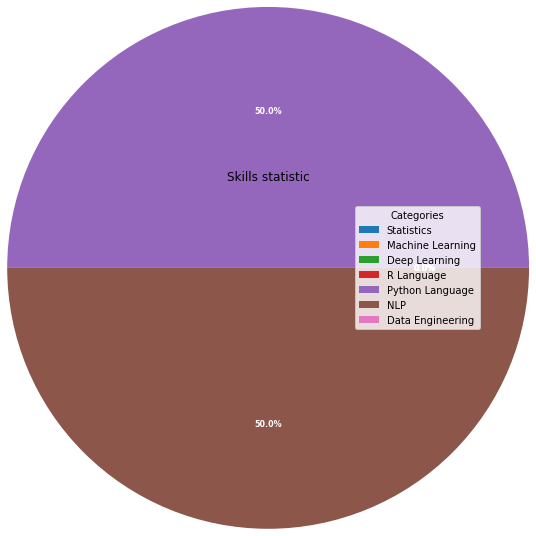

In [54]:
def plot_candidates_statistic(sample):
    score = [len(sample[x]) for x  in sample.keys()]
    categories_list = [x for x in sample.keys()]
    
    def func(pct, allvals):   
      absolute = int(pct/100.*np.sum(allvals))
      return "{:.1f}%".format(pct, absolute)


    fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
    wedges, texts, autotexts = ax.pie(score, autopct=lambda pct: func(pct, score),
                                  textprops=dict(color="w"), radius=4)

    ax.legend(wedges, categories_list,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=8, weight="bold")

    ax.set_title("Skills statistic")
    
    plt.show()

sample = get_skills(str(resumes_df.sample().iloc[:,]["Skills"]))
print(sample)
plot_candidates_statistic(sample)


In [0]:
for category in categories:
  skill = []
  for profile in profiles:
    skill.append(len(profile.get_skills()[category]))
  resumes_df[category] = skill

In [44]:
resumes_df.sample(5)

,Name,Resume,Skills,Statistics,Machine Learning,Deep Learning,R Language,Python Language,NLP,Data Engineering
50,Nikhileshkumar Ikhar,"Nikhileshkumar Ikhar\nProduct development engineer with 7+ years of experience with\nM.Tech. in IT. Successfully developed & deployed, platform & behaviour\ndesign strategies in well-established c...","{'Statistics': [], 'Machine Learning': [], 'Deep Learning': [], 'R Language': [], 'Python Language': [(Python), (Django), (Python), (Django), (Django), (Python), (Python), (Django)], 'NLP': [], 'D...",0,0,0,0,8,0,1
31,Kasturika Borah,"Kasturika Borah\nTeam Member - Cisco\n\nBengaluru, Karnataka - Email me on Indeed: indeed.com/r/Kasturika-\nBorah/9e71468914b38ee8\n\n• Software Engineer with overall 3+ years of experience in Net...","{'Statistics': [], 'Machine Learning': [], 'Deep Learning': [], 'R Language': [], 'Python Language': [(Python), (Python), (Python), (Python)], 'NLP': [], 'Data Engineering': [(SQL), (SQL), (SQL), ...",0,0,0,0,4,0,6
96,Vamsi krishna,"Vamsi krishna\nhyderbad, Telangana - Email me on Indeed: indeed.com/r/Vamsi-krishna/15906b55159d4088\n\nWilling to relocate to: hyderbad, Telangana\n\nWORK EXPERIENCE\n\nSoftware developer\n\nMicr...","{'Statistics': [], 'Machine Learning': [], 'Deep Learning': [], 'R Language': [], 'Python Language': [], 'NLP': [], 'Data Engineering': []}",0,0,0,0,0,0,0
138,Soumya Balan,"Soumya Balan\nIT SUPPORT\n\nSulthan Bathery, Kerala, Kerala - Email me on Indeed: indeed.com/r/Soumya-\nBalan/97ead9542c575355\n\n➢ To work in a progressive organization where I can enhance my ski...","{'Statistics': [], 'Machine Learning': [], 'Deep Learning': [], 'R Language': [], 'Python Language': [], 'NLP': [], 'Data Engineering': []}",0,0,0,0,0,0,0
151,Saurabh Sandhikar,"Saurabh Sandhikar\nSAURABH SANDHIKAR\n\nHyderabad, Telangana - Email me on Indeed: indeed.com/r/Saurabh-Sandhikar/\ne490c0d49e5aa698\n\nWilling to relocate to: hyderbad, Telangana\n\nWORK EXPERIEN...","{'Statistics': [], 'Machine Learning': [], 'Deep Learning': [], 'R Language': [], 'Python Language': [], 'NLP': [], 'Data Engineering': [(SQL), (SQL)]}",0,0,0,0,0,0,2


#4.Conclusions and future work

Ase we presented in this notebook, we succesfully extracted the candidates abilities and we gave two options for extracting their names. For future work we propose the study of extracting other personal information such as phone number, address, zipcode by using diffrent techniques such as regular expresions, we will also explore the posibility of divide the resume in blocks using restricted boltzmann machines and training separate support vector machines classifiers for every block to accurately label the data using both the text and the layout information. We also consider the posibility of statistical models and recurrent neural network.

#References

[1] Jinesh D. *Instant resume Evaluation Engine*, 2017

[2] Jacob D. ,Ming-Wei C. ,Kenton L. Kristina T. *BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding*, 2019

[3]Vedant B. Prateek Rawat A. Kumar R. Ratn S. *End-to-End Resume Parsing and Finding Candidates for a Job Description using BERT*, 2019

[4] Jiaze C, Liangcai G, Zhi T *Information Extraction from Resume Documents in PDFFormat*, 2016

[5] Hui Han C. Lee Giles Eren Manavoglu Hongyuan, Automatic Document Metadata *Extraction using Support Vector Machines*, 2003

[6] Duygu Çelik, Askýn Karakas, Gülsen Bal, Cem Gültunca, Atilla Elçi, Basak Buluz, Murat Can Alevli *Towards an Information Extraction System Based on Ontology to Match Resumes and Jobs*
